## CBOW

In [4]:
import sys
sys.path.append('..') 
from common.trainer import Trainer
from common.optimizer import Adam
from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot

In [20]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        # window 크기 만큼 입력층 만들어야함(여기에서는 2개)
        self.in_layer0 = MatMul(W_in) # 입력층
        self.in_layer1 = MatMul(W_in) # 입력층
        self.out_layer = MatMul(W_out) # 출력층
        self.loss_layer = SoftmaxWithLoss() # Softmax 계층

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in
        
    # 주변단어와 중심단어를 받아 손실을 반환
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss

    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

In [21]:
window_size = 1
hidden_size = 5 # 은닉층의 뉴런수
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.' # 학습데이터
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id) # 어휘수
contexts, target = create_contexts_target(corpus, window_size) # 주변단어와 중심단어 생성
target = convert_one_hot(target, vocab_size) # one-hot encoding
contexts = convert_one_hot(contexts, vocab_size)

model_1 = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam() # 매개변수 갱신 알고리즘
trainer_1 = Trainer(model_1, optimizer)

trainer_1.fit(contexts, target, max_epoch, batch_size)

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 215 |  반복 1 / 2 | 시간 0[s] | 손실 1.20
| 에폭 216 |  반복 1 / 2 | 시간 0[s] | 손실 1.33
| 에폭 217 |  반복 1 / 2 | 시간 0[s] | 손실 1.16
| 에폭 218 |  반복 1 / 2 | 시간 0[s] | 손실 1.19
| 에폭 219 |  반복 1 / 2 | 시간 0[s] | 손실 1.17
| 에폭 220 |  반복 1 / 2 | 시간 0[s] | 손실 1.29
| 에폭 221 |  반복 1 / 2 | 시간 0[s] | 손실 1.30
| 에폭 222 |  반복 1 / 2 | 시간 0[s] | 손실 1.12
| 에폭 223 |  반복 1 / 2 | 시간 0[s] | 손실 1.27
| 에폭 224 |  반복 1 / 2 | 시간 0[s] | 손실 1.16
| 에폭 225 |  반복 1 / 2 | 시간 0[s] | 손실 1.21
| 에폭 226 |  반복 1 / 2 | 시간 0[s] | 손실 1.13
| 에폭 227 |  반복 1 / 2 | 시간 0[s] | 손실 1.26
| 에폭 228 |  반복 1 / 2 | 시간 0[s] | 손실 1.27
| 에폭 229 |  반복 1 / 2 | 시간 0[s] | 손실 1.12
| 에폭 230 |  반복 1 / 2 | 시간 0[s] | 손실 1.20
| 에폭 231 |  반복 1 / 2 | 시간 0[s] | 손실 1.25
| 에폭 232 |  반복 1 / 2 | 시간 0[s] | 손실 1.11
| 에폭 233 |  반복 1 / 2 | 시간 0[s] | 손실 1.18
| 에폭 234 |  반복 1 / 2 | 시간 0[s] | 손실 1.18
| 에폭 235 |  반복 1 / 2 | 시간 0[s] | 손실 1.21
| 에폭 236 |  반복 1 / 2 | 시간 0[s] | 손실 1.16
| 에폭 237 |  반복 1 / 2 | 시간 0[s] | 손실 1.10
| 에폭 238 |  반복 1 / 2 | 시간 0[s] | 손실 1.25
| 에폭 239 |  반복 1

| 에폭 539 |  반복 1 / 2 | 시간 0[s] | 손실 0.93
| 에폭 540 |  반복 1 / 2 | 시간 0[s] | 손실 1.06
| 에폭 541 |  반복 1 / 2 | 시간 0[s] | 손실 0.78
| 에폭 542 |  반복 1 / 2 | 시간 0[s] | 손실 0.94
| 에폭 543 |  반복 1 / 2 | 시간 0[s] | 손실 0.94
| 에폭 544 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 545 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 546 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 547 |  반복 1 / 2 | 시간 0[s] | 손실 1.05
| 에폭 548 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 549 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 550 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 551 |  반복 1 / 2 | 시간 0[s] | 손실 1.05
| 에폭 552 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 553 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 554 |  반복 1 / 2 | 시간 0[s] | 손실 1.03
| 에폭 555 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 556 |  반복 1 / 2 | 시간 0[s] | 손실 1.05
| 에폭 557 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 558 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 559 |  반복 1 / 2 | 시간 0[s] | 손실 1.03
| 에폭 560 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 561 |  반복 1 / 2 | 시간 0[s] | 손실 0.94
| 에폭 562 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 563 |  반복 1

| 에폭 932 |  반복 1 / 2 | 시간 0[s] | 손실 0.77
| 에폭 933 |  반복 1 / 2 | 시간 0[s] | 손실 0.53
| 에폭 934 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 935 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 936 |  반복 1 / 2 | 시간 0[s] | 손실 0.53
| 에폭 937 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 938 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 939 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 940 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 941 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 942 |  반복 1 / 2 | 시간 0[s] | 손실 0.77
| 에폭 943 |  반복 1 / 2 | 시간 0[s] | 손실 0.69
| 에폭 944 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 945 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 946 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 947 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 948 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 949 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 950 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 951 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 952 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 953 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 954 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 955 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 956 |  반복 1

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48373 missing from cur

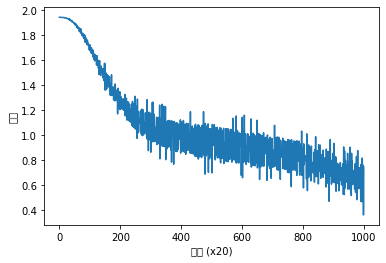

In [22]:
trainer_1.plot()

In [23]:
# 단어의 벡터화(분산 표현)
word_vecs = model_1.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [-1.0331557  1.4908739  1.0934668 -1.1287165  1.0466669]
say [ 1.1957185 -1.3022566 -1.1625206  1.1983812 -0.9222242]
goodbye [-0.93402     0.17910701  0.9271167  -0.80303305  0.9623636 ]
and [ 0.9889143  -0.8030064  -0.23482111  1.0273185  -1.9423556 ]
i [-0.93943924  0.16178013  0.9094774  -0.80810183  0.9638554 ]
hello [-1.0457454  1.4962969  1.084381  -1.1236862  1.0553558]
. [ 1.0780638 -1.3777897 -1.6589302  0.9900303  1.0074736]


## Skip-gram

In [8]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul,SoftmaxWithLoss 

In [24]:
class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer = MatMul(W_in) # 입력층
        self.out_layer = MatMul(W_out) # 출력층
        self.loss_layer1 = SoftmaxWithLoss() # Softmax 계층
        self.loss_layer2 = SoftmaxWithLoss() # Softmax 계층

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None

In [25]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model_2 = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer_2 = Trainer(model_2, optimizer)

trainer_2.fit(contexts, target, max_epoch, batch_size)

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 26 |

| 에폭 496 |  반복 1 / 2 | 시간 0[s] | 손실 2.22
| 에폭 497 |  반복 1 / 2 | 시간 0[s] | 손실 2.15
| 에폭 498 |  반복 1 / 2 | 시간 0[s] | 손실 2.17
| 에폭 499 |  반복 1 / 2 | 시간 0[s] | 손실 2.66
| 에폭 500 |  반복 1 / 2 | 시간 0[s] | 손실 2.27
| 에폭 501 |  반복 1 / 2 | 시간 0[s] | 손실 2.17
| 에폭 502 |  반복 1 / 2 | 시간 0[s] | 손실 2.23
| 에폭 503 |  반복 1 / 2 | 시간 0[s] | 손실 2.42
| 에폭 504 |  반복 1 / 2 | 시간 0[s] | 손실 2.23
| 에폭 505 |  반복 1 / 2 | 시간 0[s] | 손실 2.23
| 에폭 506 |  반복 1 / 2 | 시간 0[s] | 손실 2.35
| 에폭 507 |  반복 1 / 2 | 시간 0[s] | 손실 2.14
| 에폭 508 |  반복 1 / 2 | 시간 0[s] | 손실 2.35
| 에폭 509 |  반복 1 / 2 | 시간 0[s] | 손실 2.38
| 에폭 510 |  반복 1 / 2 | 시간 0[s] | 손실 2.44
| 에폭 511 |  반복 1 / 2 | 시간 0[s] | 손실 2.07
| 에폭 512 |  반복 1 / 2 | 시간 0[s] | 손실 2.41
| 에폭 513 |  반복 1 / 2 | 시간 0[s] | 손실 2.22
| 에폭 514 |  반복 1 / 2 | 시간 0[s] | 손실 2.19
| 에폭 515 |  반복 1 / 2 | 시간 0[s] | 손실 2.28
| 에폭 516 |  반복 1 / 2 | 시간 0[s] | 손실 2.37
| 에폭 517 |  반복 1 / 2 | 시간 0[s] | 손실 2.34
| 에폭 518 |  반복 1 / 2 | 시간 0[s] | 손실 2.00
| 에폭 519 |  반복 1 / 2 | 시간 0[s] | 손실 2.28
| 에폭 520 |  반복 1

| 에폭 825 |  반복 1 / 2 | 시간 0[s] | 손실 2.21
| 에폭 826 |  반복 1 / 2 | 시간 0[s] | 손실 1.82
| 에폭 827 |  반복 1 / 2 | 시간 0[s] | 손실 1.98
| 에폭 828 |  반복 1 / 2 | 시간 0[s] | 손실 2.20
| 에폭 829 |  반복 1 / 2 | 시간 0[s] | 손실 1.80
| 에폭 830 |  반복 1 / 2 | 시간 0[s] | 손실 1.76
| 에폭 831 |  반복 1 / 2 | 시간 0[s] | 손실 2.44
| 에폭 832 |  반복 1 / 2 | 시간 0[s] | 손실 1.82
| 에폭 833 |  반복 1 / 2 | 시간 0[s] | 손실 2.00
| 에폭 834 |  반복 1 / 2 | 시간 0[s] | 손실 2.22
| 에폭 835 |  반복 1 / 2 | 시간 0[s] | 손실 1.54
| 에폭 836 |  반복 1 / 2 | 시간 0[s] | 손실 1.96
| 에폭 837 |  반복 1 / 2 | 시간 0[s] | 손실 2.25
| 에폭 838 |  반복 1 / 2 | 시간 0[s] | 손실 1.98
| 에폭 839 |  반복 1 / 2 | 시간 0[s] | 손실 1.98
| 에폭 840 |  반복 1 / 2 | 시간 0[s] | 손실 2.03
| 에폭 841 |  반복 1 / 2 | 시간 0[s] | 손실 1.98
| 에폭 842 |  반복 1 / 2 | 시간 0[s] | 손실 1.98
| 에폭 843 |  반복 1 / 2 | 시간 0[s] | 손실 2.23
| 에폭 844 |  반복 1 / 2 | 시간 0[s] | 손실 1.79
| 에폭 845 |  반복 1 / 2 | 시간 0[s] | 손실 2.20
| 에폭 846 |  반복 1 / 2 | 시간 0[s] | 손실 1.77
| 에폭 847 |  반복 1 / 2 | 시간 0[s] | 손실 1.97
| 에폭 848 |  반복 1 / 2 | 시간 0[s] | 손실 2.01
| 에폭 849 |  반복 1

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48373 missing from cur

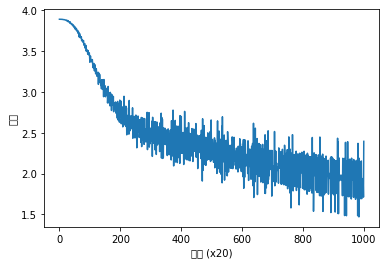

In [26]:
trainer_2.plot()

In [28]:
word_vecs = model_2.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [ 0.00551056  0.00324935 -0.00870891 -0.004351    0.01543883]
say [-0.28737858  0.72553587 -0.82963765  0.8352423   0.28673375]
goodbye [ 0.9282934  -0.6995974   0.68644834 -0.71467096  1.1724726 ]
and [-1.2003835   1.0519077  -0.99827355  1.015377   -1.3595172 ]
i [ 0.92062247 -0.68478537  0.7055223  -0.72143465  1.1810315 ]
hello [ 0.12636107 -1.0750449   1.0869839  -1.0677607  -0.80380553]
. [ 0.00275971  0.00780681 -0.00097374  0.00836847  0.0112609 ]
